In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [2]:
def select_poligon(df, poligon):
    list_index = []
    for i in range(0, len(df['Latitude'])):
        point = Point((df['Longitude'][i],df['Latitude'][i]))
        if poligon.contains(point):
            list_index.append(i)
    df = df.filter(items = list_index, axis=0)
    return df

In [3]:
df = pd.read_csv('data/training_15N_suelos.csv')
#del df['Unnamed: 0']

df

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,...,bio13,bio14,bio15,bio16,bio17,bio18,bio19,Latitude,Longitude,15N
0,16.680066,19.940985,73.603150,222.898539,30.221051,3.088484,27.132568,17.506520,18.646753,19.269062,...,4.613000,0.0,60.611061,4.751000,0.0,0.000,3.476000,-22.85000,-69.2600,13.55
1,13.945570,16.422479,66.199236,302.465765,26.373077,1.530497,24.842580,13.844643,15.541803,17.465280,...,8.833000,0.0,101.518006,9.362000,0.0,2.718,3.804000,-23.52000,-67.9700,2.92
2,17.292080,7.011714,49.380242,201.289604,25.103611,10.860042,14.243569,18.758515,19.791519,20.085420,...,3.282000,0.0,34.821223,3.308000,0.0,2.485,1.177000,-23.50000,-70.5400,12.88
3,8.004621,13.752827,67.942430,172.048517,18.357537,-1.905314,20.262851,9.505382,7.752109,10.127124,...,50.704000,0.0,190.829799,80.729999,0.0,59.217,1.203000,-18.36000,-69.5600,6.38
4,19.663313,6.021628,46.403303,214.393737,27.463324,14.379219,13.084105,21.727257,22.187209,22.400360,...,0.004000,0.0,0.110187,0.004000,0.0,0.000,0.004000,-18.40000,-70.3400,-1.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,15.688830,13.730183,58.347884,338.546730,28.680324,5.104891,23.575432,11.618111,18.571219,20.023326,...,73.083000,0.0,183.600223,116.499001,0.0,2.352,106.626000,-30.98022,-71.0612,4.16
136,15.272948,14.016008,59.113067,336.015721,28.228734,4.478181,23.750553,11.251113,18.414650,19.505320,...,67.519999,0.0,184.767328,101.455999,0.0,2.761,82.951999,-30.71162,-71.1770,5.09
137,15.272948,14.016008,59.113067,336.015721,28.228734,4.478181,23.750553,11.251113,18.414650,19.505320,...,67.519999,0.0,184.767328,101.455999,0.0,2.761,82.951999,-30.71162,-71.1770,6.32
138,15.211451,13.884745,59.017968,336.079665,28.098760,4.505688,23.593072,11.148939,18.697681,19.452640,...,69.826999,0.0,181.998907,107.880999,0.0,2.588,96.348999,-30.88676,-71.1931,3.06


In [4]:
CUENCA = 'Atacama'

df_poligon = pd.read_csv('data/cuencas_poligonos.csv')
atacama_poli = list(eval(df_poligon[CUENCA][0]))

poligon = Polygon(atacama_poli)

In [5]:
df_cuenca = select_poligon(df, poligon)

np.shape(df_cuenca)

(51, 22)

In [6]:
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
import models
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [37]:
X = df_cuenca[df_cuenca.keys()[:-1]].values
y = df_cuenca['15N'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape); print(X_test.shape)

regr = MLPRegressor(random_state=1, max_iter=10000).fit(X_train, y_train)
regr.score(X_test, y_test)

(40, 21)
(11, 21)


0.6184940645255818

In [38]:
model1 = models.Model1(X_train, X_test, y_train, y_test)
model1.fit()

y_predict1 = model1.predict()
y_predict1

reg_1 = linregress(y_test, y_predict1)
mse1 = mean_squared_error(y_test, y_predict1)

In [39]:
model2 = models.Model2(X_train, X_test, y_train, y_test)
model2.fit()

y_predict2 = model2.predict()
y_predict2

reg_2 = linregress(y_test, y_predict2)
mse2 = mean_squared_error(y_test, y_predict2)

In [40]:
model3 = models.Model3(X_train, X_test, y_train, y_test)
model3.fit()

y_predict3 = model3.predict()
y_predict3

reg_3 = linregress(y_test, y_predict3)
mse3 = mean_squared_error(y_test, y_predict3)

In [41]:
model4 = models.Model4(X_train, X_test, y_train, y_test)
model4.fit()

y_predict4 = model4.predict()
y_predict4

reg_4 = linregress(y_test, y_predict4)
mse4 = mean_squared_error(y_test, y_predict4)

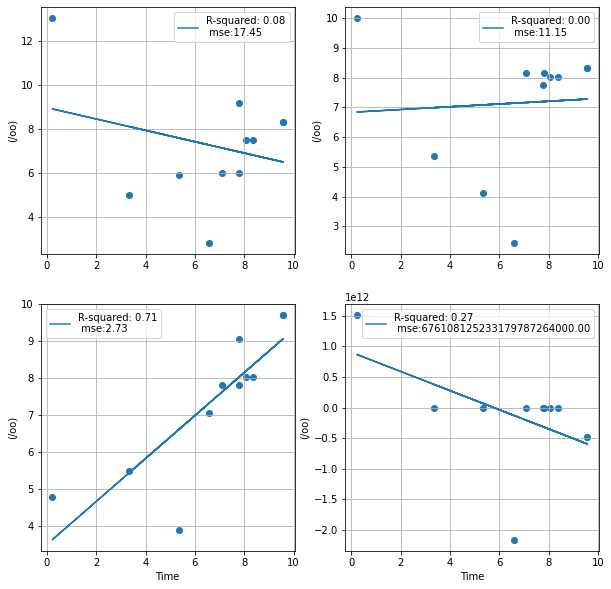

In [42]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(10,10)
fig.suptitle('')

ax[0,0].scatter(y_test, y_predict1)
ax[0,0].plot(y_test, reg_1.intercept + reg_1.slope*y_test, label = f"R-squared: {reg_1.rvalue**2:.2f}\n mse:{mse1:.2f}")
ax[0,0].set_ylabel('(/oo)')
ax[0,0].set_title('')
ax[0,0].legend()
ax[0,0].grid(True)

ax[0,1].scatter(y_test, y_predict2)
ax[0,1].plot(y_test, reg_2.intercept + reg_2.slope*y_test, label = f"R-squared: {reg_2.rvalue**2:.2f}\n mse:{mse2:.2f} ")
ax[0,1].set_ylabel('(/oo)')
ax[0,1].set_title('')
ax[0,1].legend()
ax[0,1].grid(True)


ax[1,0].scatter(y_test, y_predict3)
ax[1,0].plot(y_test, reg_3.intercept + reg_3.slope*y_test, label = f"R-squared: {reg_3.rvalue**2:.2f}\n mse:{mse3:.2f}")
ax[1,0].set_xlabel('Time')
ax[1,0].set_ylabel('(/oo)')
ax[1,0].set_title('')
ax[1,0].legend()
ax[1,0].grid(True)


ax[1,1].scatter(y_test, y_predict4)
ax[1,1].plot(y_test, reg_4.intercept + reg_4.slope*y_test, label = f"R-squared: {reg_4.rvalue**2:.2f}\n mse:{mse4:.2f}")
ax[1,1].set_xlabel('Time')
ax[1,1].set_ylabel('(/oo)')
ax[1,1].set_title('')
ax[1,1].legend()
ax[1,1].grid(True)




In [37]:
import pickle

In [40]:
file_2 = open('model2_15N_p.obj', 'wb') 
pickle.dump(model2, file_2)

file_3 = open('model3_15N_p.obj', 'wb') 
pickle.dump(model3, file_3)